# Pre-Processing of the Images of the PAD-UFES-20 Dataset

The PAD-UFES.20 Dataset is composed of skin lesion dataset composed of patient data and clinical images collected from smartphones. In total, this dataset has 2,298 images.
The dataset is publicly available for download at: https://data.mendeley.com/datasets/zr7vgbcyr2/1

In [1]:
import glob
from PIL import Image
import numpy as np

directory = "**"

2298


In [10]:
images = np.zeros((2298,128,128,3))
labels = []
count = 0

list_files = glob.glob(directory + "/imgs/*.png", recursive=True)
for k in list_files:
    image = Image.open(k)
    image = image.convert('RGB')
    new_image = image.resize((128, 128))
    new_image
    images[count] = np.asarray(new_image)
    labels.append(k.split("/")[-1])
    count = count+1


In [11]:
np.save("labels_pad-ufes.npy",labels)
np.save("images_pad-ufes.npy",np.uint8(images))

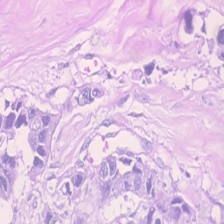

In [8]:
Image.fromarray(imgs[7908])

In [2]:
import pandas as pd
classes = pd.read_csv('metadata.csv')

classes

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1708_3156_175.png,False
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True
2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,NaN,SEK,False,False,False,False,False,False,PAT_1343_1217_404.png,False
2296,PAT_326,690,False,False,POMERANIA,POMERANIA,58,True,FEMALE,True,...,4.0,BCC,True,False,False,False,False,True,PAT_326_690_823.png,True


In [4]:
#To define the concepts within the code, a complementary csv file is created.
temp_df = pd.DataFrame()

temp_df['img_id'] = classes['img_id']
temp_df['ACK'] = (classes['diagnostic'] == "ACK")
temp_df['BCC'] = (classes['diagnostic'] == "BCC")
temp_df['skin_cancer_history_true'] = classes['skin_cancer_history'] == True
temp_df['skin_cancer_history_false'] = classes['skin_cancer_history'] == False
temp_df['cancer_history_true'] = classes['cancer_history'] == True
temp_df['cancer_history_false'] = classes['cancer_history'] == False
temp_df['fitspatrick_2'] = classes['fitspatrick'] == 2.0
temp_df['fitspatrick_3'] = classes['fitspatrick'] == 3.0

temp_df['region_face'] = classes['region'] == "FACE"
temp_df['region_forearm'] = classes['region'] == "FOREARM"
temp_df['region_chest'] = classes['region'] == "CHEST"

temp_df['itch_true'] = classes['itch'] == "True"
temp_df['itch_false'] = classes['itch'] == "False"

temp_df['grew_true'] = classes['grew'] == "True"
temp_df['grew_false'] = classes['grew'] == "False"

temp_df['bleed_true'] = classes['bleed'] == "True"
temp_df['bleed_false'] = classes['bleed'] == "False"

In [7]:
temp_df.to_csv('data_pad-ufes.csv', sep=',')

In [8]:
temp_df


,img_id,ACK,BCC,skin_cancer_history_true,skin_cancer_history_false,cancer_history_true,cancer_history_false,fitspatrick_2,fitspatrick_3,region_face,region_forearm,region_chest,itch_true,itch_false,grew_true,grew_false,bleed_true,bleed_false
0,PAT_1516_1765_530.png,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1,PAT_46_881_939.png,False,True,True,False,True,False,False,True,False,False,False,True,False,True,False,True,False
2,PAT_1545_1867_547.png,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True
3,PAT_1989_4061_934.png,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,PAT_684_1302_588.png,False,True,True,False,False,True,False,False,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,PAT_1708_3156_175.png,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
2294,PAT_46_880_140.png,False,True,True,False,True,False,False,True,False,False,True,True,False,True,False,False,True
2295,PAT_1343_1217_404.png,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True
2296,PAT_326_690_823.png,False,True,True,False,True,False,False,True,True,False,False,True,False,False,True,False,True
